### Imports

In [1]:
import gym
import numpy as np
from actor_critic import Agent
from utils import plotLearning
import os
import pickle as pkl

### Main

... loading model ...
... saving model ...
Episode  25 Score 13.0 best score 13.0 avg_score 26.3
... saving model ...
Episode  26 Score 17.0 best score 17.0 avg_score 25.7
Episode  27 Score 11.0 best score 17.0 avg_score 23.9
... saving model ...
Episode  28 Score 20.0 best score 20.0 avg_score 23.9
... saving model ...
Episode  29 Score 39.0 best score 39.0 avg_score 25.3
... saving model ...
Episode  30 Score 40.0 best score 40.0 avg_score 26.7
Episode  31 Score 18.0 best score 40.0 avg_score 26.4
Episode  32 Score 14.0 best score 40.0 avg_score 23.9
Episode  33 Score 12.0 best score 40.0 avg_score 23.3
Episode  34 Score 15.0 best score 40.0 avg_score 22.4
... saving model ...
Episode  35 Score 61.0 best score 61.0 avg_score 24.4
Episode  36 Score 22.0 best score 61.0 avg_score 24.6
Episode  37 Score 56.0 best score 61.0 avg_score 26.6
Episode  38 Score 20.0 best score 61.0 avg_score 25.7
Episode  39 Score 28.0 best score 61.0 avg_score 25.9
Episode  40 Score 25.0 best score 61.0 avg

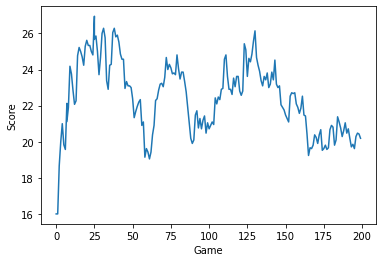

In [18]:
if __name__ == '__main__':
    env_name = 'CartPole-v0'
    env = gym.make(env_name)
    directory = 'D:\Reinforcement Learning\My codes\A2C Algorithm/'

    if (not os.path.exists(directory + 'models/'+str(env_name))):
        os.makedirs(os.path.join(directory + 'models/', str(env_name)+'/'))
    if (not os.path.exists(directory + 'plots/'+str(env_name))):
        os.makedirs(os.path.join(directory + 'plots/', str(env_name)+'/'))    
    if (not os.path.exists(directory + 'pickle/'+str(env_name))):
        os.makedirs(os.path.join(directory + 'pickle/', str(env_name)+'/'))
    
    plot_file = env_name+'.png'
    figure_file = directory + 'plots/'+ str(env_name)+'/' + env_name
    pickle_file = directory + 'pickle/'
    model_file = directory + 'models/'+str(env_name)+'/'

    agent = Agent(alpha=1e-5, n_actions= env.action_space.n, pickle_file = pickle_file, env_name=env_name, model_file = model_file)
        
    
    best_score = env.reward_range[0]
    score_history = []
    steps_list = []
    n_steps = 0
    
    n_episodes = 200
    prev_n_episode = 0
    episodes= []
    
    load_checkpoint = True
    train = True
    
    if load_checkpoint:
        agent.load_models()
        
        score_history = pkl.load(agent.pklObj)
        prev_n_episode =  pkl.load(agent.pklObj)
        steps_list = pkl.load(agent.pklObj)
        episodes = pkl.load(agent.pklObj)
        n_steps = steps_list[-1]
        
    for i in range(prev_n_episode, n_episodes):
        observation = env.reset()
        done = False
        score = 0
        episodes.append(i)
        
        if not train:
            env.render()
            
        while not done:
            action = agent.choose_action(observation)
            observation_, reward,done, info = env.step(action)
            score += reward
            n_steps+=1
            
            
            if train:
                agent.learn(observation, reward, observation_, done)
                
            observation = observation_
            
        score_history.append(score)
        steps_list.append(n_steps)
        avg_score = np.mean(score_history[-20:])
        
        if train or (train and i==(n_episodes-1)):
            if score >= best_score:
                agent.save_models()
                
                pkl.dump(score_history, agent.pklObj)
                pkl.dump(i,agent.pklObj)
                pkl.dump(steps_list, agent.pklObj)
                pkl.dump(episodes,agent.pklObj)
                
                best_score = score

        print('Episode ', i, 'Score %.1f' %score, 'best score %.1f' %best_score, 'avg_score %.1f' %avg_score)
        
    plotLearning(x=episodes,scores= score_history, filename= figure_file, window=20)
        